In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
Run1 = np.transpose(np.loadtxt('Run1_data.csv', delimiter = ','))
peak_distance = np.transpose(np.loadtxt('periods.csv', delimiter = ','))

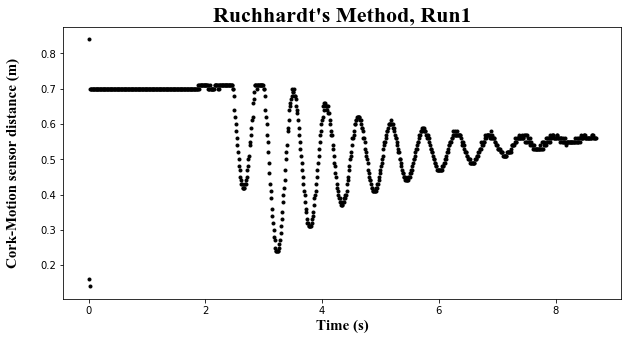

In [13]:
#Showing how the pattern looks like
plt.figure(figsize = [10,5])

plt.xlabel('Time (s)', fontname = 'Times New Roman', fontsize = 15)
plt.ylabel('Cork-Motion sensor distance (m)', fontname = 'Times New Roman', fontsize = 15, labelpad = 20)
plt.title("Ruchhardt's Method, Run1", fontname = 'Times New Roman', fontsize = '22')

plt.plot(Run1[0], Run1[1], 'k.')

plt.show()

In [21]:
period = peak_distance[1]/peak_distance[0]
tau = np.mean (period)
tau_ste = np.std(period)/np.sqrt(len(period))
print (tau,tau_ste)

0.559147619047619 0.0003626214707732511


In [33]:
#Considering that this uncertainty is less than the measurement uncertainty of 0.01s
err_tau = np.sqrt(0.01**2+0.0004**2)
print (err_tau)
print ('The value of τ is therefore:', 0.56, '±', 0.01, 's.' )

0.010007996802557442
The value of τ is therefore: 0.56 ± 0.01 s.


In [36]:
m = 0.00541 #kg
err_m = 10**(-6) #kg
V = 0.0092057 #m^3
err_V = 8*10**(-6) #m^3
d = 16.52*10**(-3) #m
err_d = 2*10**(-5) #m
r = d/2
err_r = err_d/2

P0 = 101500 #Pa
P = P0 + m*9.8/(np.pi*r**2)
err_P = np.sqrt((9.8/(np.pi*r**2))**2*err_m**2 + (-2*m*9.8/(np.pi*r**3))**2*err_r**2)


gamma = (4*m*V)/(r**4*P*tau**2)

err_gamma_m = (4*V*err_m/(r**4*P*tau**2))**2
err_gamma_V = (4*m*err_V/(r**4*P*tau**2))**2
err_gamma_r = (-16*m*V*err_r/(r**5*P*tau**2))**2
err_gamma_P = (-4*m*V*err_P/(r**4*P**2*tau**2))**2
err_gamma_tau = (-8*m*V*err_tau/(r**4*P*tau**3))**2

err_gamma = np.sqrt(err_gamma_m + err_gamma_V + err_gamma_r + err_gamma_P + err_gamma_tau)

print (gamma)
print (err_gamma)
print ("The value of γ calculated using Rucchardt's method is:", 1.35,'±', 0.05, '.' )

1.3452958876655376
0.048611357852373166
The value of γ calculated using Rucchardt's method is: 1.35 ± 0.05 .
